# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 

df = pd.read_csv('data/human_body_temperature.csv')

In [17]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [19]:
#Computes ECDF -- from Data Camp

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

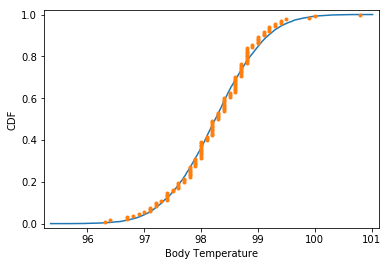

In [20]:
#1. Is the distribution of body temperatures normal? It looks like it is according the graph below
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df.temperature)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('CDF')
plt.show()

In [21]:
stats.normaltest(df.temperature)
#Since the pvalue is .25 we cannot reject the null hypothesis that this sample is drawn from a normal distribution

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

2) Is the sample size large? Are the observations independent?
The central limit theorem states that as you get larger and larger samples of a distribution, the mean of the samples will get closer to the mean of the population. For this to hold true, the general rule of thumb is a sample size > 30 and in this case, the sample size is large because it is 130 observations. Yes the observations are independent because they do not depend on the other observations

3) Is the true population mean really 98.6 degrees F?
    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the  tt  or  zz  statistic?
    Now try using the other test. How is the result be different? Why?

In [22]:
total_obs=len(df.temperature)
print('Total Observations:', total_obs)
print('Sample Mean:', mu) #sample_mean
print('Sample Standard Deviation:', sigma) #sample_std

Total Observations: 130
Sample Mean: 98.24923076923078
Sample Standard Deviation: 0.7303577789050377


Null Hypothesis: The true mean human body temperature is actually 98.6 degrees F
Alternative Hypothesis: The true mean human body temperature is not 98.6 degrees F
Will conduct a one-sample test because we are comparing one set of data to a single number (98.6)
Since both of the p-values are very small (way less than 0.05 or 0.01), it suggests that the mean body temp is NOT 98.6 deg F
In this example, the z test is more appropriate since the sample size is large

In [23]:
from statsmodels.stats.weightstats import ztest
t_stat, p_valuet = stats.ttest_1samp(df.temperature,98.6)
z_stat, p_valuez = ztest(df.temperature,value=98.6)
print('t-statistic:', t_stat, 'p-value:', p_valuet)
print('z-statistic:', z_stat, 'p-value:', p_valuez)

t-statistic: -5.45482329236 p-value: 2.41063204156e-07
z-statistic: -5.45482329236 p-value: 4.9021570141e-08


In [24]:
#4. Draw a small sample of size 10 from the data and repeat both tests
#The t-statistic is best for sample sizes that are under 30 and when the population std is unknown

ten_sample = np.random.choice(df.temperature, 10)
t_stat10, p_valuet10 = stats.ttest_1samp(ten_sample,98.6)
z_stat10, p_valuez10 = ztest(ten_sample,value=98.6)
print('For sample size of ten:')
print('t-statistic:', t_stat10, 'p-value:', p_valuet10)
print('z-statistic:', z_stat10, 'p-value:', p_valuez10)

For sample size of ten:
t-statistic: -0.747574318811 p-value: 0.473796004626
z-statistic: -0.747574318811 p-value: 0.454716959838


5) At what temperature should we consider someone's temperature to be "abnormal"? To do this, we can use a 95 percent confidence interval, which gives an interval in which we are 95% confident the true mean lies.  95 percent of temperatures should lie two standard deviations from the mean. Temperatures that lie outside of the confidence interval are considered "abnormal." Confidence interval: sample mean +/- margin of error where margin of error = zstat * (sigma/sqrt(len(data)))

In [25]:
#Find the standard error of the mean: sem = np.std(data) / np.sqrt(len(data))
sem = np.std(df.temperature) / np.sqrt(total_obs)
#Find zscore 
zscore = stats.norm.ppf(.975)
margin_of_error = zscore * sem
CI_low = mu - margin_of_error
CI_upper = mu + margin_of_error

print('Margin of error:')
print(margin_of_error)
print('95% Confidence interval:')
print('[',CI_low,',',CI_upper,']')

Margin of error:
0.125548657774
95% Confidence interval:
[ 98.1236821115 , 98.374779427 ]


6) Is there a significant difference between males and females in normal temperature?
    What test did you use and why?
    Write a story with your conclusion in the context of the original problem.
    
For this, we will use a two sample t-test to find the difference of means, since we don't have the population std
Null hypothesis: There is no significant difference between the mean temp of men and women
Alternative hypothesis: There is a significant difference between the mean temp of men and women

Since our p-value is less than 0.05, we reject the null hypothesis that there is no significant difference between mean male and female body temperatures. We accept the alternative hypothesis. The p-value suggests that there is  2% chance that there is this big of a difference between samples if male and female body temperature were identical

In [26]:
df_f = df[df['gender'] == 'F']
df_m = df[df['gender'] == 'M']
f_temp = df_f.temperature
m_temp = df_m.temperature

stats.ttest_ind(f_temp, m_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)